In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/hrishikesh/Desktop/New_Capstones/Group 5_Diabetes/dataset_diabetes/dataset_diabetes/diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df=df.replace('?',np.NaN)

In [5]:
df.isnull().sum()[df.isnull().sum()>0]

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

# Checking missing values %ages

In [6]:
def missing_check(df): #checking % of missing values in each columns
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#print("Missing check:",missing_data )
    return (missing_data)
missing_check(df)

,Total,Percent
weight,98569,0.968585
medical_specialty,49949,0.490822
payer_code,40256,0.395574
race,2273,0.022336
diag_3,1423,0.013983
diag_2,358,0.003518
diag_1,21,0.000206
num_procedures,0,0.000000
max_glu_serum,0,0.000000
number_diagnoses,0,0.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

In [8]:
df=df.drop(['encounter_id','weight'],axis=1)

In [9]:
mode1=df['medical_specialty'].mode()[0]
df['medical_specialty']=df['medical_specialty'].fillna(mode1)

In [10]:
df['payer_code']=df['payer_code'].fillna(df['payer_code'].mode()[0])

In [11]:
df['race']=df['race'].fillna(df['race'].mode()[0])

In [12]:
df['diag_1']=df['diag_1'].fillna(df['diag_1'].mode()[0])

In [13]:
df['diag_2']=df['diag_2'].fillna(df['diag_2'].mode()[0])

In [14]:
df['diag_3']=df['diag_3'].fillna(df['diag_3'].mode()[0])

In [15]:
df.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [16]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    df.loc[condition,col] = '250'

df[diag_cols] = df[diag_cols].astype(float)




In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766 non-null float64
diag_2                      1017

In [18]:
def diag1_cat(d1):
    if 390<=d1<=459 or d1==785:
         return 'circulatory'
    elif 520<d1<579 or d1==787:
         return 'digestive'
    elif 580<=d1<=629 or d1==788:
        return 'genitourinary'
    elif 800<=d1<=999:
        return 'injury'
    elif 710<=d1<=739:
        return 'musculoskeletal'
    elif 140<=d1<=239:
        return 'neoplasms'
    elif d1==250:
        return 'diabetes'
    else:
        return 'others'
df['diag_1']=df['diag_1'].apply(diag1_cat)

In [19]:
def diag2_cat(d2):
    if 390<=d2<=459 or d2==785:
         return 'circulatory'
    elif 520<=d2<=579 or d2==787:
         return 'digestive'
    elif 580<=d2<=629 or d2==788:
        return 'genitourinary'
    elif 800<=d2<=999:
        return 'injury'
    elif 710<=d2<=739:
        return 'musculoskeletal'
    elif 140<=d2<=239:
        return 'neoplasms'
    elif d2==250:
        return 'diabetes'
    else:
        return 'others'
df['diag_2']=df['diag_2'].apply(diag2_cat)

In [20]:
def diag3_cat(d3):
    if 390<=d3<=459 or d3==785:
         return 'circulatory'
    elif 520<=d3<=579 or d3==787:
         return 'digestive'
    elif 580<=d3<=629 or d3==788:
        return 'genitourinary'
    elif 800<=d3<=999:
        return 'injury'
    elif 710<=d3<=739:
        return 'musculoskeletal'
    elif 140<=d3<=239:
        return 'neoplasms'
    elif d3==250:
        return 'diabetes'
    else:
        return 'others'
df['diag_3']=df['diag_3'].apply(diag3_cat)

In [21]:
df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,MC,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),2,1,2,3,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,84259809,Caucasian,Male,[60-70),3,1,2,4,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,114882984,Caucasian,Male,[70-80),1,1,7,5,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,>30
8,48330783,Caucasian,Female,[80-90),2,1,4,13,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,63555939,Caucasian,Female,[90-100),3,3,4,12,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [26]:
d24_cols = ['metformin','repaglinide','nateglinide','chlorpropamide',
 'glimepiride','acetohexamide','glipizide','glyburide',
 'tolbutamide','pioglitazone','rosiglitazone','acarbose',
 'miglitol','troglitazone','tolazamide','examide',
 'citoglipton','insulin','glyburide-metformin','glipizide-metformin',
 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

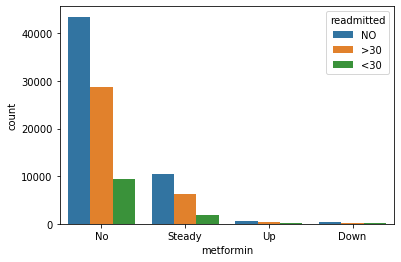

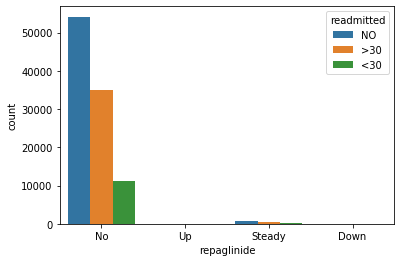

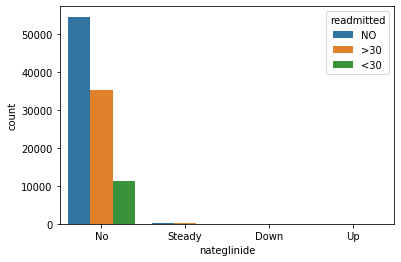

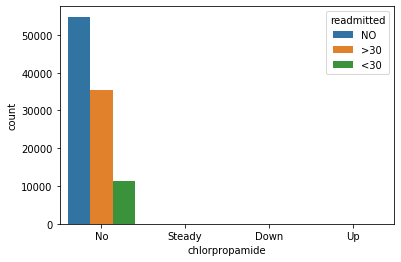

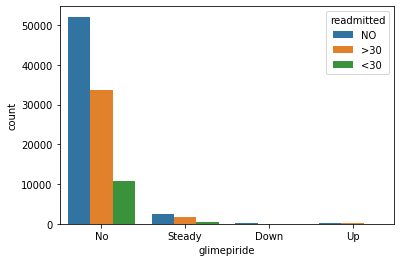

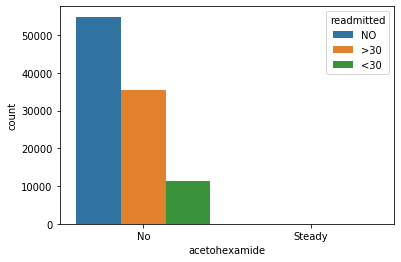

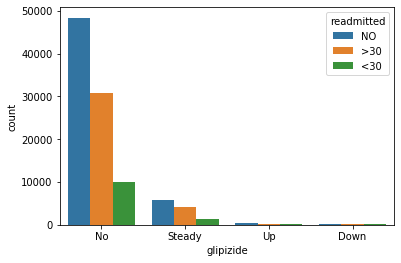

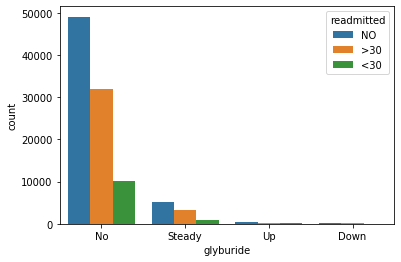

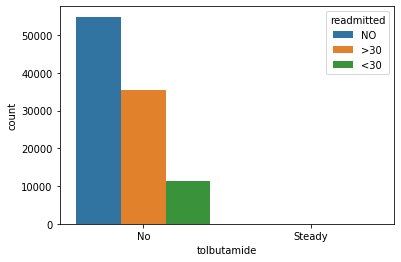

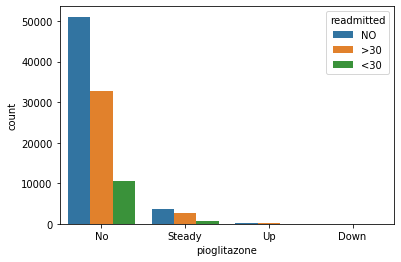

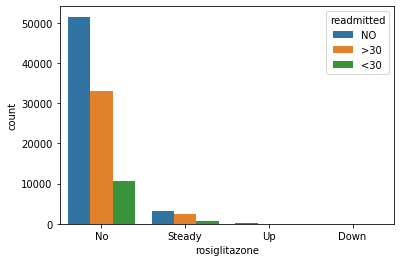

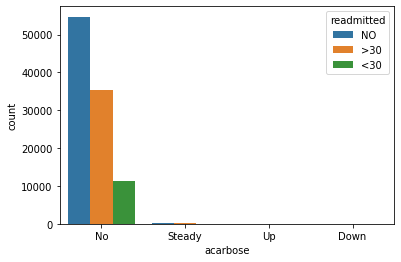

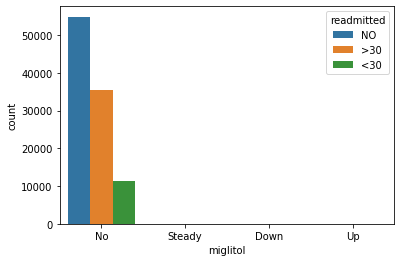

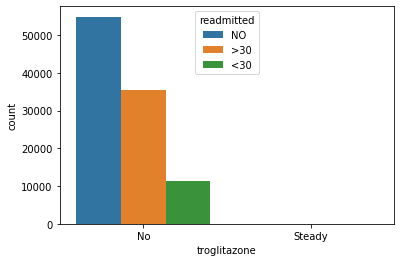

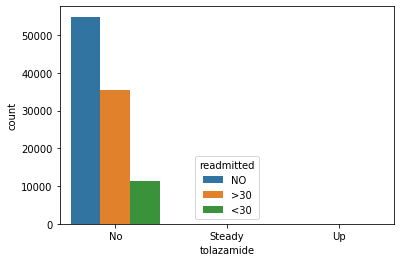

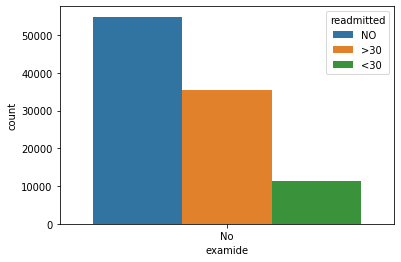

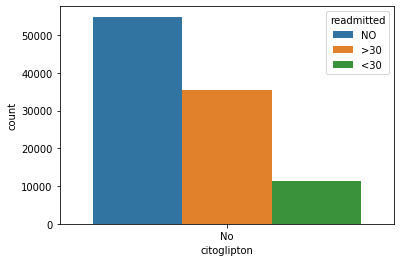

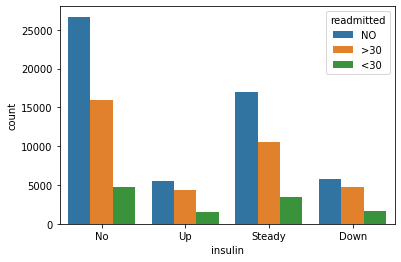

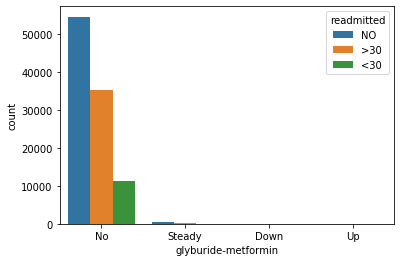

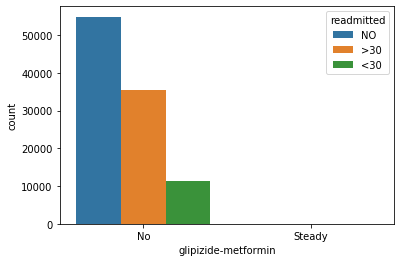

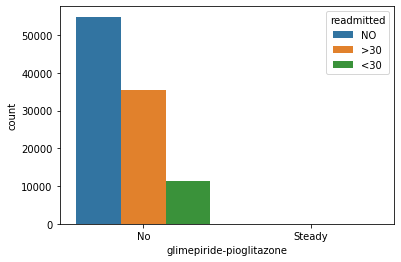

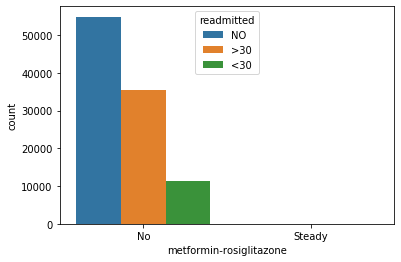

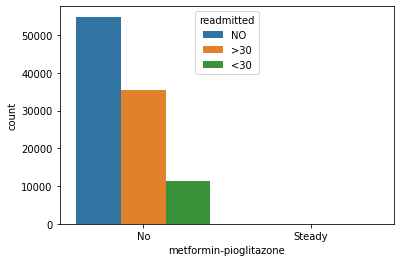

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols=list(d24_cols)
for col in num_cols:
    plt.figure()
    sns.countplot(df[col],hue='readmitted',data=df)
    plt.show()

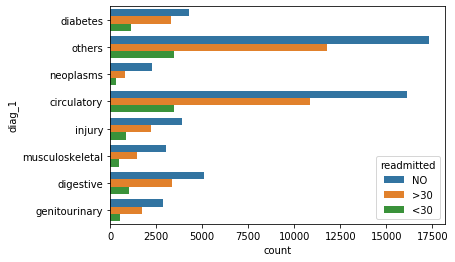

In [28]:
sns.countplot(y='diag_1',hue='readmitted',data=df)

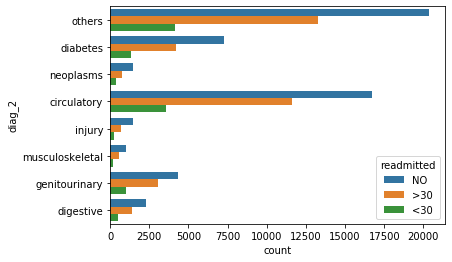

In [29]:
sns.countplot(y='diag_2',hue='readmitted',data=df)

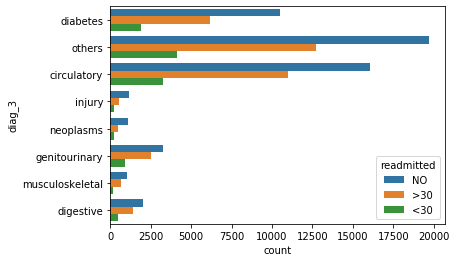

In [30]:
sns.countplot(y='diag_3',hue='readmitted',data=df)

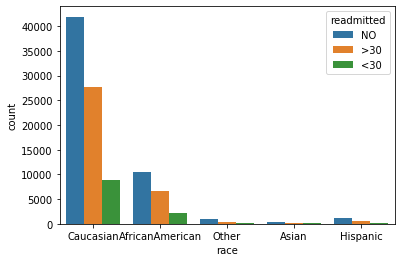

In [31]:
sns.countplot(x='race',hue='readmitted',data=df)

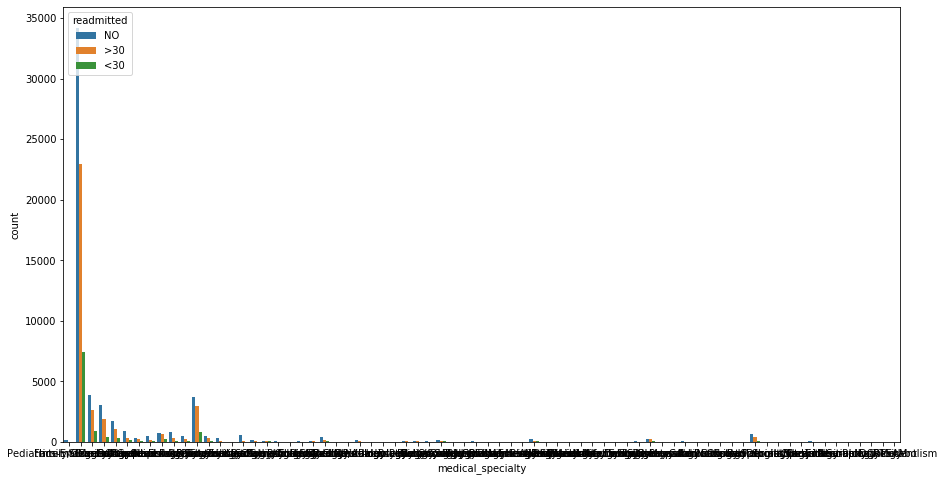

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x='medical_specialty',hue='readmitted',data=df)

In [33]:
df['medical_specialty'].value_counts()

InternalMedicine                     64584
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-Endocrinology               159
Otolaryngol

In [34]:
# cat_cols = list(df.select_dtypes('object').columns)
# class_dict = {}
# for col in cat_cols:
#     df1 = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col])], axis=1)
# df1.head()

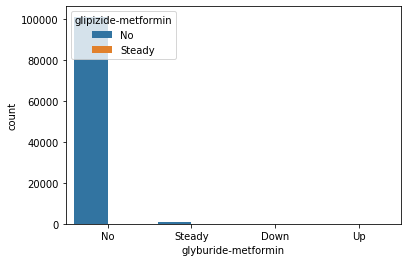

In [35]:
sns.countplot(x='glyburide-metformin',hue='glipizide-metformin',data=df)

In [36]:
df.groupby('readmitted').agg({'insulin':'count','metformin':'count','glyburide-metformin':'count'})

,insulin,metformin,glyburide-metformin
readmitted,,,
<30,11357,11357,11357
>30,35545,35545,35545
NO,54864,54864,54864


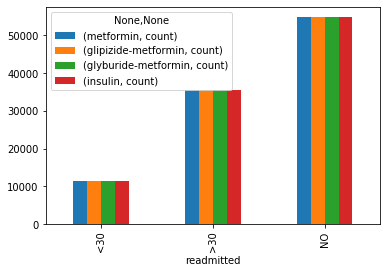

In [37]:
df.groupby('readmitted')[['metformin','glipizide-metformin','glyburide-metformin','insulin']].agg(['count']).plot.bar()

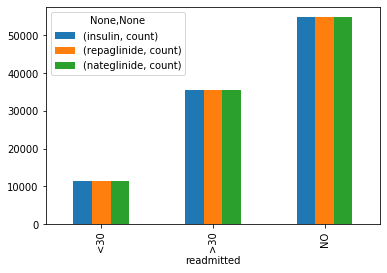

In [38]:
df.groupby('readmitted')[['insulin','repaglinide','nateglinide']].agg(['count']).plot.bar()

In [39]:
df.corr()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
patient_nbr,1.000000,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
admission_type_id,-0.011128,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,-0.136814,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,-0.032568,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.024092,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,0.015946,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.015570,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.020665,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103379,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,0.062352,-0.019116,-0.024471,0.059892,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539


In [40]:
df.readmitted

0          NO
1         >30
2          NO
3          NO
4          NO
5         >30
6          NO
7         >30
8          NO
9          NO
10        >30
11        <30
12        <30
13         NO
14        >30
15         NO
16        <30
17         NO
18        >30
19         NO
20         NO
21         NO
22         NO
23        >30
24         NO
25         NO
26         NO
27        >30
28        >30
29        >30
         ... 
101736    >30
101737     NO
101738     NO
101739     NO
101740     NO
101741     NO
101742     NO
101743     NO
101744     NO
101745     NO
101746    <30
101747    >30
101748    >30
101749     NO
101750    <30
101751     NO
101752     NO
101753     NO
101754    >30
101755    >30
101756    >30
101757     NO
101758     NO
101759     NO
101760    >30
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [41]:
df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,MC,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),2,1,2,3,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,84259809,Caucasian,Male,[60-70),3,1,2,4,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,114882984,Caucasian,Male,[70-80),1,1,7,5,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,>30
8,48330783,Caucasian,Female,[80-90),2,1,4,13,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,63555939,Caucasian,Female,[90-100),3,3,4,12,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


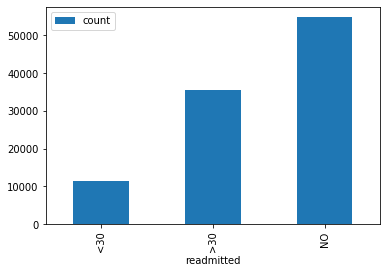

In [42]:
df.groupby('readmitted')['insulin'].agg(['count']).plot.bar()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766 non-null object
diag_2                      10176

In [44]:
df=df.drop(['medical_specialty','payer_code'],axis=1)

In [45]:
catg=df[['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']]
#contains CATEGORICAL nominal
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
catg = catg.apply(le.fit_transform)
catg.head()
df = df.drop(catg.columns, axis=1)
df = pd.concat([df, catg], axis=1)
df.head()


,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,6,25,1,1,41,0,1,0,0,...,0,1,1,0,0,0,0,1,0,2
1,55629189,1,1,7,3,59,0,18,0,0,...,0,3,1,0,0,0,0,0,1,1
2,86047875,1,1,7,2,11,5,13,2,0,...,0,1,1,0,0,0,0,1,1,2
3,82442376,1,1,7,2,44,1,16,0,0,...,0,3,1,0,0,0,0,0,1,2
4,42519267,1,1,7,1,51,0,8,0,0,...,0,2,1,0,0,0,0,0,1,2


In [46]:
# cat_cols = list(df.select_dtypes('object').columns)
# class_dict = {}
# for col in cat_cols:
#     df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col])], axis=1)
# df.head()

In [47]:
df

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,6,25,1,1,41,0,1,0,0,...,0,1,1,0,0,0,0,1,0,2
1,55629189,1,1,7,3,59,0,18,0,0,...,0,3,1,0,0,0,0,0,1,1
2,86047875,1,1,7,2,11,5,13,2,0,...,0,1,1,0,0,0,0,1,1,2
3,82442376,1,1,7,2,44,1,16,0,0,...,0,3,1,0,0,0,0,0,1,2
4,42519267,1,1,7,1,51,0,8,0,0,...,0,2,1,0,0,0,0,0,1,2
5,82637451,2,1,2,3,31,6,16,0,0,...,0,2,1,0,0,0,0,1,1,1
6,84259809,3,1,2,4,70,1,21,0,0,...,0,2,1,0,0,0,0,0,1,2
7,114882984,1,1,7,5,73,0,12,0,0,...,0,1,1,0,0,0,0,1,1,1
8,48330783,2,1,4,13,68,2,28,0,0,...,0,2,1,0,0,0,0,0,1,2
9,63555939,3,3,4,12,33,3,18,0,0,...,0,2,1,0,0,0,0,0,1,2


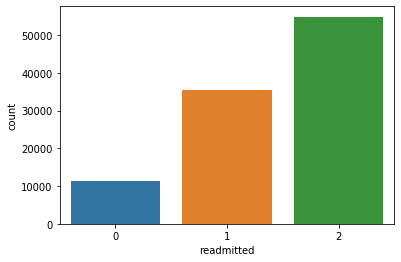

In [48]:
sns.countplot(x='readmitted',data=df)

In [49]:
contingency_table = pd.crosstab(
    df['insulin'],
    df['readmitted'],
    margins = True
)
contingency_table

readmitted,0,1,2,All
insulin,,,,
0,1698,4752,5768,12218
1,4756,15949,26678,47383
2,3433,10482,16934,30849
3,1470,4362,5484,11316
All,11357,35545,54864,101766


In [50]:
from scipy import stats
stats.chi2_contingency(contingency_table)

(516.695760681305,
 6.183558736504679e-103,
 12,
 array([[  1363.51852289,   4267.52363265,   6586.95784447,
          12218.        ],
        [  5287.90294401,  16550.01410098,  25545.08295501,
          47383.        ],
        [  3442.72245151,  10774.99071399,  16631.2868345 ,
          30849.        ],
        [  1262.8560816 ,   3952.47155238,   6100.67236602,
          11316.        ],
        [ 11357.        ,  35545.        ,  54864.        ,
         101766.        ]]))

In [51]:
contingency_table1 = pd.crosstab(
    df['readmitted'],
    df['metformin'],
    margins = True
)
contingency_table1

metformin,0,1,2,3,All
readmitted,,,,,
0,69,9418,1782,88,11357
1,190,28839,6169,347,35545
2,316,43521,10395,632,54864
All,575,81778,18346,1067,101766


In [52]:
from scipy import stats
stats.chi2_contingency(contingency_table1)

(104.84177702756082,
 6.235194906838028e-17,
 12,
 array([[6.41695163e+01, 9.12635601e+03, 2.04739817e+03, 1.19076302e+02,
         1.13570000e+04],
        [2.00836969e+02, 2.85635577e+04, 6.40792180e+03, 3.72683558e+02,
         3.55450000e+04],
        [3.09993515e+02, 4.40880863e+04, 9.89068003e+03, 5.75240139e+02,
         5.48640000e+04],
        [5.75000000e+02, 8.17780000e+04, 1.83460000e+04, 1.06700000e+03,
         1.01766000e+05]]))

In [53]:
contingency_table1 = pd.crosstab(
    df['repaglinide'],
    df['readmitted'],
    margins = True
)
contingency_table1

readmitted,0,1,2,All
repaglinide,,,,
0,3,19,23,45
1,11152,34905,54170,100227
2,182,588,614,1384
3,20,33,57,110
All,11357,35545,54864,101766


In [54]:
from scipy import stats
stats.chi2_contingency(contingency_table1)

(58.96485669479044,
 3.483260853908778e-08,
 12,
 array([[5.02196215e+00, 1.57176758e+01, 2.42603620e+01, 4.50000000e+01],
        [1.11852489e+04, 3.50074555e+04, 5.40342956e+04, 1.00227000e+05],
        [1.54453236e+02, 4.83405853e+02, 7.46140912e+02, 1.38400000e+03],
        [1.22759075e+01, 3.84209854e+01, 5.93031071e+01, 1.10000000e+02],
        [1.13570000e+04, 3.55450000e+04, 5.48640000e+04, 1.01766000e+05]]))

In [55]:
contingency_table2 = pd.crosstab(
    df['race'],
    df['readmitted'],
    margins = True
)
contingency_table2

readmitted,0,1,2,All
race,,,,
0,2155,6634,10421,19210
1,65,161,415,641
2,8780,27662,41930,78372
3,212,642,1183,2037
4,145,446,915,1506
All,11357,35545,54864,101766


In [56]:
from scipy import stats
stats.chi2_contingency(contingency_table2)

(81.93522840271112,
 3.086948681053927e-11,
 15,
 array([[2.14381984e+03, 6.70970118e+03, 1.03564790e+04, 1.92100000e+04],
        [7.15350608e+01, 2.23889560e+02, 3.45575379e+02, 6.41000000e+02],
        [8.74624928e+03, 2.73739043e+04, 4.22518465e+04, 7.83720000e+04],
        [2.27327487e+02, 7.11486793e+02, 1.09818572e+03, 2.03700000e+03],
        [1.68068333e+02, 5.26018218e+02, 8.11913448e+02, 1.50600000e+03],
        [1.13570000e+04, 3.55450000e+04, 5.48640000e+04, 1.01766000e+05]]))

In [57]:
contingency_table3 = pd.crosstab(
    df['glimepiride-pioglitazone'],
    df['readmitted'],
    margins = True
)
contingency_table3

readmitted,0,1,2,All
glimepiride-pioglitazone,,,,
0,11357,35544,54864,101765
1,0,1,0,1
All,11357,35545,54864,101766


In [58]:
from scipy import stats
stats.chi2_contingency(contingency_table3)

(1.8630370157464875,
 0.9318540918040096,
 6,
 array([[1.13568884e+04, 3.55446507e+04, 5.48634609e+04, 1.01765000e+05],
        [1.11599159e-01, 3.49281685e-01, 5.39119156e-01, 1.00000000e+00],
        [1.13570000e+04, 3.55450000e+04, 5.48640000e+04, 1.01766000e+05]]))

In [59]:
contingency_table4 = pd.crosstab(
    df['glipizide-metformin'],
    df['readmitted'],
    margins = True
)
contingency_table3

readmitted,0,1,2,All
glimepiride-pioglitazone,,,,
0,11357,35544,54864,101765
1,0,1,0,1
All,11357,35545,54864,101766


In [60]:
stats.chi2_contingency(contingency_table3)

(1.8630370157464875,
 0.9318540918040096,
 6,
 array([[1.13568884e+04, 3.55446507e+04, 5.48634609e+04, 1.01765000e+05],
        [1.11599159e-01, 3.49281685e-01, 5.39119156e-01, 1.00000000e+00],
        [1.13570000e+04, 3.55450000e+04, 5.48640000e+04, 1.01766000e+05]]))

In [61]:
from statsmodels.tools import add_constant as add_constant      #asigning beta not
df_constant = add_constant(df)
df_constant.head()

C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1.0,8222157,6,25,1,1,41,0,1,0,...,0,1,1,0,0,0,0,1,0,2
1,1.0,55629189,1,1,7,3,59,0,18,0,...,0,3,1,0,0,0,0,0,1,1
2,1.0,86047875,1,1,7,2,11,5,13,2,...,0,1,1,0,0,0,0,1,1,2
3,1.0,82442376,1,1,7,2,44,1,16,0,...,0,3,1,0,0,0,0,0,1,2
4,1.0,42519267,1,1,7,1,51,0,8,0,...,0,2,1,0,0,0,0,0,1,2


In [62]:
import statsmodels.api as sm
import scipy.stats as st

In [63]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(df['readmitted'],df, family = sm.families.Binomial()) #generalized linear model glm
logm1.fit().summary()


C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:               101766
Model:                            GLM   Df Residuals:                   101722
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 27 Dec 2019   Deviance:                          nan
Time:                        14:21:12   Pearson chi2:                 2.47e+20
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
patient_nbr              -8.091e+07      0.006   -1.4e+10      0.000   -8.09e+07   -8.09e+07
admission_type_id         -1.32e+15   1.54e+05  -8.56e+09      0.000   -1.32e+15   -1.32e+15
discharge_disposition_id  1.049e+15   4.14e+04   2.54e+10      0.000    1.05e+15    1.05e+15
admission_source_id       -4.24e+14   5.36e+04  -7.91e+09      0.000   -4.24e+14   -4.24e+14
time_in_hospital         -2.153e+14   8.44e+04  -2.55e+09      0.000   -2.15e+14   -2.15e+14
num_lab_procedures       -5.379e+13   1.17e+04  -4.59e+09      0.000   -5.38e+13   -5.38e+13
num_procedures            1.467e+15   1.43e+05   1.03e+10      0.000    1.47e+15    1.47e+15
num_medications           8.608e+13   3.36e+04   2.56e+09      0.000    8.61e+13    8.61e+13
number_outpatient        -2.724e+15   1.69e+05  -1.61e+10      0.000   -2.72e+15   -2.72e+15
number_emergency         -1.336e+15   2.37e+05  -5.63e+09      0.000   -1.34e+15   -1.34e+15
number_inpatient         -2.701e+14    1.8e+05   -1.5e+09      0.000    -2.7e+14    -2.7e+14
number_diagnoses         -1.937e+15   1.24e+05  -1.56e+10      0.000   -1.94e+15   -1.94e+15
race                      9.349e+14   2.54e+05   3.68e+09      0.000    9.35e+14    9.35e+14
gender                    2.302e+15   4.26e+05    5.4e+09      0.000     2.3e+15     2.3e+15
age                       1.058e+14   1.43e+05    7.4e+08      0.000    1.06e+14    1.06e+14
diag_1                     2.39e+14   7.47e+04    3.2e+09      0.000    2.39e+14    2.39e+14
diag_2                    3.957e+14   7.04e+04   5.62e+09      0.000    3.96e+14    3.96e+14
diag_3                    4.846e+14   7.01e+04   6.92e+09      0.000    4.85e+14    4.85e+14
max_glu_serum            -3.605e+14   6.83e+05  -5.28e+08      0.000   -3.61e+14   -3.61e+14
A1Cresult                 8.347e+14   4.12e+05   2.03e+09      0.000    8.35e+14    8.35e+14
metformin                 1.709e+14   5.17e+05   3.31e+08      0.000    1.71e+14    1.71e+14
repaglinide              -1.022e+15   1.56e+06  -6.53e+08      0.000   -1.02e+15   -1.02e+15
nateglinide              -2.669e+15   2.39e+06  -1.12e+09      0.000   -2.67e+15   -2.67e+15
chlorpropamide           -4.518e+16   5.74e+06  -7.87e+09      0.000   -4.52e+16   -4.52e+16
glimepiride              -2.589e+15   8.89e+05  -2.91e+09      0.000   -2.59e+15   -2.59e+15
acetohexamide             -1.34e+17   6.71e+07     -2e+09      0.000   -1.34e+17   -1.34e+17
glipizide                 -2.57e+15      6e+05  -4.28e+09      0.000   -2.57e+15   -2.57e+15
glyburide                -9.959e+14   6.36e+05  -1.57e+09      0.000   -9.96e+14   -9.96e+14
tolbutamide              -2.062e+15    1.4e+07  -1.47e+08      0.000   -2.06e+15   -2.06e+15
pioglitazone             -4.161e+15   7.96e+05  -5.23e+09      0.000   -4.16e+15   -4.16e+15
rosiglitazone 

## have to use chisquare test statistical as glm results are not proper

chisquare for all the columns

In [94]:
num_cols=list(df_cols)
for col in num_cols:
    contingency_table= pd.crosstab(
    df[col],
    df['readmitted'],
    margins = True)
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
    print(col,"===P-Value===")
    print(p_val)

patient_nbr ===P-Value===
1.0
admission_type_id ===P-Value===
4.334461173443669e-73
discharge_disposition_id ===P-Value===
0.0
admission_source_id ===P-Value===
1.6589964211631003e-207
time_in_hospital ===P-Value===
2.212690850854848e-90
num_lab_procedures ===P-Value===
1.295472122205188e-10
num_procedures ===P-Value===
5.1105758341970257e-48
num_medications ===P-Value===
1.3995021176323367e-118
number_outpatient ===P-Value===
7.195604794351733e-209
number_emergency ===P-Value===
0.0
number_inpatient ===P-Value===
0.0
number_diagnoses ===P-Value===
2.5514164238184905e-268
race ===P-Value===
3.086948681053927e-11
gender ===P-Value===
2.1770116258317724e-05
age ===P-Value===
6.639378203084152e-49
diag_1 ===P-Value===
5.180851247885381e-89
diag_2 ===P-Value===
2.2202364438539004e-32
diag_3 ===P-Value===
1.5666874837535847e-37
max_glu_serum ===P-Value===
6.399866830297934e-07
A1Cresult ===P-Value===
3.03599430848373e-10
metformin ===P-Value===
6.235194906838028e-17
repaglinide ===P-Value==

In [103]:
num_cols=list(df_cols)
association=[]
noassociation=[]
for col in num_cols:
    contingency_table= pd.crosstab(df[col],df['readmitted'],margins = True)
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
    
    if(p_val>0.05):
        print(col,'\t Has no association')
        noassociation.append(col)
    else:
        print(col,'\t Has association')
        association.append(col)

patient_nbr 	 Has no association
admission_type_id 	 Has association
discharge_disposition_id 	 Has association
admission_source_id 	 Has association
time_in_hospital 	 Has association
num_lab_procedures 	 Has association
num_procedures 	 Has association
num_medications 	 Has association
number_outpatient 	 Has association
number_emergency 	 Has association
number_inpatient 	 Has association
number_diagnoses 	 Has association
race 	 Has association
gender 	 Has association
age 	 Has association
diag_1 	 Has association
diag_2 	 Has association
diag_3 	 Has association
max_glu_serum 	 Has association
A1Cresult 	 Has association
metformin 	 Has association
repaglinide 	 Has association
nateglinide 	 Has no association
chlorpropamide 	 Has no association
glimepiride 	 Has no association
acetohexamide 	 Has no association
glipizide 	 Has association
glyburide 	 Has no association
tolbutamide 	 Has no association
pioglitazone 	 Has association
rosiglitazone 	 Has association
acarbose 	 Has 

In [106]:
print('with assoiation list ',association,'\n','\n \n no association',noassociation)

with assoiation list  ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glipizide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin', 'change', 'diabetesMed', 'readmitted'] 
 
 
 no association ['patient_nbr', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glyburide', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


have to drop the columns of the no association list